In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
data = "climate_data.csv"
df = pd.read_csv(data)

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
df.fillna(method="ffill", inplace=True)

C:\Users\NonsoDev\AppData\Local\Temp\ipykernel_7836\173857299.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [18]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua And Barbuda',
    'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
    'Bhutan', 'Bolivia', 'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
    'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
    'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
    'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
    'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
    'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
    'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
    'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
    'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
    'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos',
    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
    'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro',
    'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'Norway', 'Oman',
    'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
    'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
    'Saint Kitts And Nevis', 'Saint Lucia', 'Saint Vincent And The Grenadines',
    'Samoa', 'San Marino', 'Sao Tome And Principe', 'Saudi Arabia', 'Senegal',
    'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
    'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka',
    'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
    'Tajikistan', 'Tanzania', 'Thailand', 'Timor Leste', 'Togo', 'Tonga',
    'Trinidad And Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine',
    'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
    'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'
]

In [8]:
countries_df = df[df["Country"].isin(countries)]

In [9]:
countries_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
3239,1838-04-01,13.008,2.586,Afghanistan
3240,1838-05-01,13.008,2.586,Afghanistan
3241,1838-06-01,23.950,2.510,Afghanistan
3242,1838-07-01,26.877,2.883,Afghanistan
3243,1838-08-01,24.938,2.992,Afghanistan
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [37]:
continents = [
    'Africa', 'Asia', 'Australia', 'Europe', 'North America', 'Oceania', 'South America'
]


In [ ]:
continents_df = df[df["Country"].isin(continents)]


In [ ]:
continents_df.loc[:,"dt"] = pd.to_datetime(continents_df["dt"])

In [40]:
continents_df.columns = ["dt","AverageTemperature",	"AverageTemperatureUncertainty","Continents"]

In [ ]:
# use a facate grid to plot out every continent plot

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
unique_continents = continents_df["Continents"].unique()

In [42]:
unique_continents_colour = plt.cm.Set2(range(len(unique_continents)))

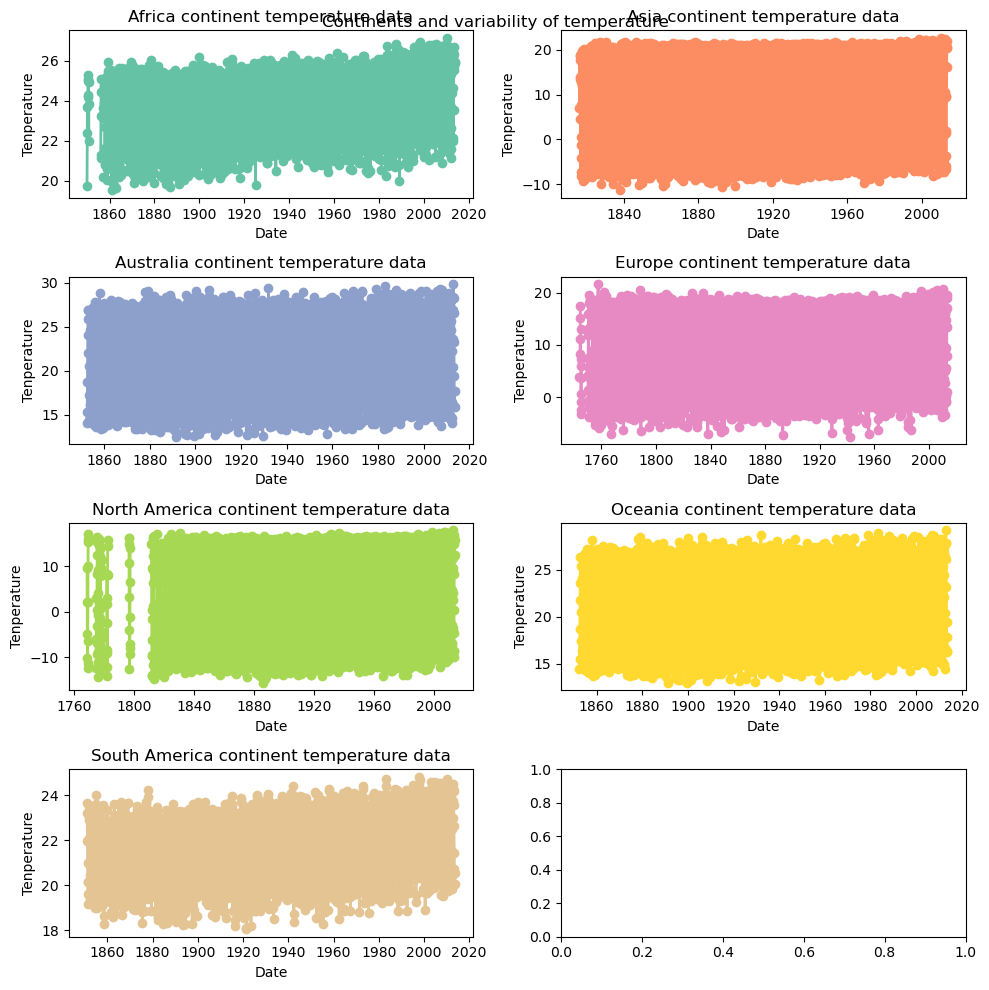

In [51]:
fig, axes = plt.subplots(nrows=math.ceil(len(unique_continents)/2), ncols=2, figsize=(10,10))
axes = axes.flatten()

for i, continent in enumerate(unique_continents):
    date = continents_df[continents_df["Continents"] == continent]["dt"]
    temp = continents_df[continents_df["Continents"] == continent]["AverageTemperature"]
    axes[i].plot(date, temp, marker='o', linestyle='-', color=unique_continents_colour[i], linewidth=2)
    axes[i].set_title(f"{continent} continent temperature data")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Tenperature")

plt.tight_layout()
plt.suptitle("Continents and variability of temperature")
plt.show()

In [64]:
# this seems to have so many datapoints, 
# it is too cluttered we are going to get the yearly avg temperature and see if that is better

continents_df.loc[:,"Year"] = continents_df["dt"].dt.to_period("Y")

In [82]:
continents_df[continents_df["dt"].between("1851-01-01", "1851-10-01")]

,dt,AverageTemperature,AverageTemperatureUncertainty,Continents,Year
5357,1851-01-01,NaN,NaN,Africa,1851
5358,1851-02-01,NaN,NaN,Africa,1851
5359,1851-03-01,NaN,NaN,Africa,1851
5360,1851-04-01,NaN,NaN,Africa,1851
5361,1851-05-01,NaN,NaN,Africa,1851
5362,1851-06-01,NaN,NaN,Africa,1851
5363,1851-07-01,NaN,NaN,Africa,1851
5364,1851-08-01,NaN,NaN,Africa,1851
5365,1851-09-01,NaN,NaN,Africa,1851
5366,1851-10-01,NaN,NaN,Africa,1851


In [59]:
continents_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Continents,Month
5345,1850-01-01,19.764,1.185,Africa,1850-01
5346,1850-02-01,22.393,1.188,Africa,1850-02
5347,1850-03-01,23.672,1.954,Africa,1850-03
5348,1850-04-01,24.197,1.364,Africa,1850-04
5349,1850-05-01,24.302,0.938,Africa,1850-05
...,...,...,...,...,...
486716,2013-05-01,21.416,0.168,South America,2013-05
486717,2013-06-01,20.734,0.225,South America,2013-06
486718,2013-07-01,20.076,0.167,South America,2013-07
486719,2013-08-01,20.541,0.248,South America,2013-08


In [75]:
continents_df_YEAR = continents_df.groupby(["Continents","Year"])["AverageTemperature"].mean()

In [78]:
continents_df_YEAR.reset_index()

,Continents,Year,AverageTemperature
0,Africa,1850,23.672273
1,Africa,1851,NaN
2,Africa,1852,NaN
3,Africa,1853,NaN
4,Africa,1854,NaN
...,...,...,...
1361,South America,2009,22.652583
1362,South America,2010,22.677333
1363,South America,2011,22.473000
1364,South America,2012,22.722583
